In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pymrm import construct_grad, construct_div
from IPython.display import clear_output, display

In [27]:
v = 1.0
D = 1e-2
R = 0.1
L = 1.0
v = 1.0
N = 30

r_f = np.linspace(0,R,N+1)
r_c = 0.5*(r_f[0:-1]+r_f[1:])
c_in = np.ones(N)
bc = {'a':[1,0],'b':[0,1],'d':[0,0]}
Grad, grad_bc = construct_grad(c_in.shape, r_f, r_c, bc, axis=0)
Div = construct_div(c_in.shape, r_f, nu=1, axis=0)
Jac = (1.0/v) * Div @ Grad
f_const = (1.0/v) * Div @ grad_bc

def f(t, c):
    f = (Jac @ c.reshape((-1,1)) + f_const).reshape(c.shape)
    return f

def compute_flux(c):
    flux = -D*(Grad[[-1],:] @ c.reshape((-1,1))) + grad_bc[[-1],:]
    return flux
    

In [29]:
sol = solve_ivp(f, [0,L], c_in)

C:\Users\eajfpeters\AppData\Local\Temp\ipykernel_25760\3162359737.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flux[i] = compute_flux(c)


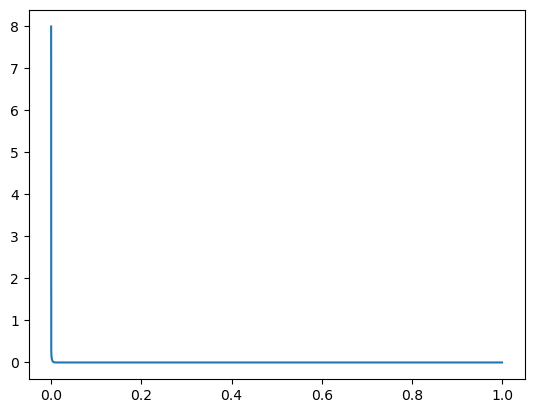

In [28]:
flux = np.zeros_like(sol.t)
for i in range(sol.t.shape[0]):
    c = sol.y[:,i].reshape((-1,1))
    flux[i] = compute_flux(c)
    
plt.plot(sol.t,flux)